Matthew Rozak Q 2&3 Collin Willson Q1

Lab 4

Question 2 (6.9 c,d,e)

In [35]:
#imports
import numpy as np
import numpy.linalg as lin
import scipy.constants as c
import matplotlib.pyplot as plt
import gaussxw as gs

def gaussint(g,x1,x2,n):#define function for gaussian quadrature
    """takes a function G a start value of 
    x1, an end value of x2 and integrates
    using the gaussian quadrature"""
    x,w=gs.gaussxw(n)#method taken from textbook
    xp=0.5*(x2-x1)*x+0.5*(x2+x1)
    wp=0.5*(x2-x1)*w
    s=0.0
    for l in range(n):
        s+=wp[l]*g(xp[l])#sum integral
    return s


6.9.c) In this question we are estimating H for the first 10 indicies of its rows and columns, and calculating the eigenvalues of the truncated matrix adn their corresponding eigenvalues.

In [3]:
#6.9.c
"""In order to solve this probel we are first going to need to define global parameters then make a 
function that calculates the H matrix for the given condition with conditionalstatements to determine
wich function to use for a givine set of indicies in the matrix. Once we have the functioin we can
make a 10x10 H matric for the given initial conditiona and then plug the matrix into eigh to find the
eigenvalues and eigenvectors"""
L=5 #angstroms
a=1.6022*10**-18 #eV
M=9.1094*10**-31
def mat(val):
    """the munction mat makes a hermition matrix of 
    size [val x val] corresponding to the given 
    definition for the values of H based off its 
    indicies"""
    L=5*10**-10#convert to SI
    H=np.empty([val,val])#empty matrix to set values of answer

    for i in range (1,len(H[0])+1):#made sure to change index to correspond to states ie starting at 1 as recognized
        #by a human not starting at 0
        for j in range (1,len(H[0])+1):
            if i==j:#Set values of the diagonal
                H[i-1][j-1]=(1/2)*a+((c.pi**2)*(c.hbar**2)*(i**2))/(2*M*L**2)
            elif i%2 != j%2 or j%2 != i%2:#set values where indicies arenot both even or odd
                H[i-1][j-1]=-(8*a*i*j)/(((c.pi**2)*(i**2-j**2)**2))
            else:#set all other values
                H[i-1][j-1]=0
    H=H*6.242e18#convert back to eV
    return H#return H matrix value

H10=mat(10)#calculate H when 10x10 then calculates eigenvalues and eigenvectors of H
eigs10,eigvecs10=lin.eigh(H10)#symetric matrix so use eigh as faster
print('H matrix for first 10 values')
print(H10)
print('eigenvalues of H for H a 10x10 matrix')
print(eigs10)
print('corresponding eigenvectors to eigenvalues of H')
print(eigvecs10)

The eigenvectors in the matrix of eigenvectors correspond to rows of the matrix.


6.9.d) In this question we are now calculating the H matrix of size 100x100, and its eigenvalues and eigenvectors.

In [4]:
#6.9.d
"""in order to solve this probel we can reuse our mat function from question 6.9.c, and then plug into
eigh to get the eigenvectors and eigenvalues"""
H100=mat(100)
eigs100,eigvecs100=lin.eigh(H100)
print(eigs100)

When we increase the size of H and use a larger sized H to calculate the eigenvalues their accuracy goes up.

6.9e) In this question we are calculating the wave equation suaring it and normalizing the square, and plotting the squared wave equation for the ground state and first 2 excited states. The squared wave equation corresponds to the probability density of finding the partie ata  given position. The wave equation is $ \psi(x)=\sum_{n=1}^{\infty} \psi_n sin(\frac{\pi nx}{L})$ where $\psi_n$ is the corresponding component of an eigenvector for a given state. 

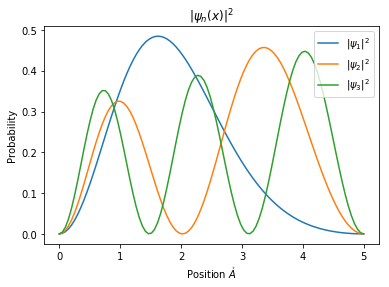

In [6]:
#6.9.e
"""In order to solve this problem we need to define a function that solves the wave equation for a given
state of the electron for the matrix of given size. From here we need to normalize the wave equation of 
the result which is done by integrating the wave equation absolute squared over the interval and then dividing 
the wave equation by the square root of the result. Once we have normalized the wave equation squated we can plot it
squared over the domain for the needed states and compare."""
def wave(x,HH,state):#define wave function for a H matrix
    """Calculates the wave equation value of a posisition for a given state and H matrix"""
    eigval,eigvecval=lin.eigh(HH)#get eigenvals and eigenvecs of the matrix
    coefs=eigvecval[:,state-1]#extract the wanted eigenvector fo the given state
    psi=0#set the value of psi to 0
    for i in range(0,len(coefs)):#sum the values of psi to calculate the value of the wave function at a position
        psi+=coefs[i]*np.sin((c.pi*(i+1))*x/L)
    return psi
xx=np.linspace(0,L,100)#get an array of values along the line
PSI=np.empty(len(xx))#array to append solution values into
state=1#test state
size=100#size of the matrix we are going to use for the calculations
def psi(x):#reduce variables by using global variables so that it can be integrated later
    return wave(x,mat(size),state)
def psiabs(x):#calculates the absolute squared of psi
    return abs((psi(x)))**2
def psin2(x):#normalizes the wave equation
    const=gaussint(psiabs,0,L,len(xx))
    return (psi(x))/np.sqrt(const)
def psisqrd(X,SZ,ST):
    """takes a position vector, a size of H matrix, and state as inputs and calculates the wave function squared
    and normalized at each position."""
    global state#allows us to set the state as functions called upon that I reduced the input to to use in functions
    #that require global variables. I did this so that I could use thes as inputs in function that use one to one 
    #functions as inputs.
    state=ST
    global size
    size=SZ
    for i in range(0,len(xx)):#calculates the values of the wave function squared and uts into output array
        PSI[i]=(psin2(X[i]))**2
    return PSI
for i in range(1,4):#plotts in ground state and first 2 excited states.
    plt.plot(xx,psisqrd(xx,100,i),label='$|\psi_%i|^2$'%i)
plt.legend()
plt.xlabel('Position $\mathring{A}$')
plt.ylabel('Probability')
plt.title('$|\psi_n(x)|^2$')

$|\psi_n(x)|^2$

We have now calculated the probability distribution of the particle in the nonuniform square well for the ground state and the first 2 excited states.

Question 3 (6.10a,b;6.11b,c,d;6.13b,c)

6.10.a) IN this question we are solving $x=1-e^{-cx}$ using the relaxation method. We are using the equation $\epsilon'=\frac{x-x'}{1-1/f'(x)'}$ for the errors on the relaxation method.

In [29]:
#6.10.a
"""In order to solve this probelm we need to make a function that takes an input function, its 
derivative, and a start value and keeps itterating it until its within a certain error, and returns 
the calculated value."""
import numpy as np
import matplotlib.pyplot as plt

c=2
accuracy=10**-6

def F(x):#function given that we are solving
    return 1 - np.exp(-c*x)

def FPRI(x):#ferivative of F
    return c*np.exp(-c*x)

def relax(f,g,x):
    """This function takes a function f, its derivative g, and a start value
    of x and solved for f(x)=x, outputs calculated value of x and the number 
    of steps required"""
    x0=x#initial starts
    x1=x#initial starts
    i=0#set counter to 0
    while abs((x1-x0)/(1-1/(g(x1)))) > accuracy or i==0:#calculates to precision 10**-6
        i+=1
        x0=x1
        x1=F(x1)
    return x1, i
print(relax(F,FPRI,1))

6.10.b) here we are graphing the solution to $x=1-e^{-cx}$ for various values of c between 0 and 3 and graphing the resulting solution that a given c has.

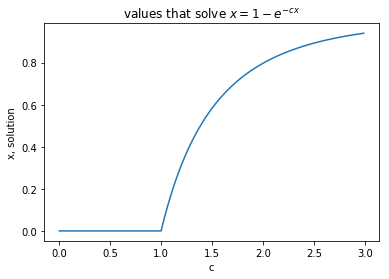

In [30]:
#6.10.b
"""Here we are using our function from a to calculate the soltion for a variety of c values and plotting the resuts.
First we need an array of C values, and then solve for every c and get the returned solution in a matrix and graph
it."""
j=np.arange(0,3,0.01)
XI=np.empty(len(j))
i=0
j[0]=0.00000001#c=0 creates a divide by 0 error, just set close ot 0 and solve
for k in range (0,len(j)):
    c=j[k]
    XI[k]=relax(F,FPRI,2)[0]
plt.plot(j,XI)
plt.xlabel('c')
plt.ylabel('x, solution')
plt.title('values that solve $x=1-e^{-cx}$' )

The graph does indeed show a very clear transition form the solution being 0 to the solution being nonzero at arround c=1.

6.11.b) Her we are modifying the equation from 6.10 and having it output the number of itterations it takes to solve the equation to a precision of $10^{-6}$ when $c=2$.

In [31]:
#6.11.b
"""here we are modifying the equation for the relaxation method and having it output the number of iteration it takes 
to solve the system. Adding a counter to the while loop and returning the value of the counter should do this."""
c=2
def relax(f,g,x):
    """This function takes a function f, its derivative g, and a start value
    of x and solved for f(x)=x, outputs calculated value of x and the number 
    of steps required"""
    x0=x#initial starts
    x1=x#initial starts
    i=0#set counter to 0
    while abs((x1-x0)/(1-1/(g(x1)))) > accuracy or i==0:#calculates to precision 10**-6
        i+=1
        x0=x1
        x1=F(x1)
    return x1, i
print(relax(F,FPRI,1)[1])

In order to get the number of itterations you need to select the index 1 of the output.

6.11.c) Here we are modifying the equation to use overrelaxation to solve the same problem. Start with $\omega = 2$. we need a new equation for the error which is $\epsilon'=\frac{x-x'}{1-1/[(1-\omega)f'(x)-\omega]}$ in the function.

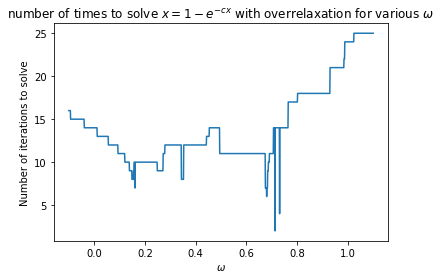

In [32]:
#6.11.c
"""Here we are modifying the relaxation method to be the overrelaxation method which moves sightly past the 
previous itteration to solve the system faster. We do this by modifying what gets plugged in again in our
relaxation method function by adding the parameter w to it. We are then finding the best W value for our system
which can be done by testing a variety of w values and then seeing which one resulted in the fewest nuber of itterations
to solve the equation."""
c=2
def overrelax(f,g,x,w):
    """This function takes a function f, its derivative g, and a start value
    of x and solved for f(x)=x, outputs calculated value of x and the number 
    of steps required"""
    x0=x#initial starts
    x1=x#initial starts
    i=0#set counter to 0
    while abs((x1-x0)/(1-1/((1+w)*g(x1)-w))) > accuracy or i==0:#calculates to precision 10**-6
        i+=1#inside changed to be overrelaxation where the next point is slightly further away from the next result.
        xi=x1
        dx=x1-x0
        x1=x0+(1+w)*dx
        x0=xi
        x1=F(x1)
    return x1, i
print('omega=0.5',overrelax(F,FPRI,1,0.5))#print check for omega =0.5
#solve for the number of iterations for varioous omegas
W=np.arange(-0.1,1.1,0.001)
L=np.zeros(len(W))
for k in range(0,len(L)):
    w=W[k]
    L[k]=overrelax(F,FPRI,1,w)[1]
#plot results
plt.plot(W,L)
plt.xlabel('$\omega$')
plt.ylabel('Number of iterations to solve')
plt.title('number of times to solve $x=1-e^{-cx}$ with overrelaxation for various $\omega$ ')
plt.show()
#get location of smallest omega
for m in range(len(L)):
    if L[m]==min(L):
        loc=m
#set w equal to smallest omega to solve
w=W[loc]
print('omega=',w)
print(overrelax(F,FPRI,1,w))

We found that setting omega equal to approximatly 0.713 results in 2 itteration required to find the solution to the equation $x=1-e^{-cx}$ to an accuracy of $10^{-6}$ with the overrelaxation method, compared to finding the solution to the same equation to the same accuracy with the relaxation method wich took 14 itterations.

6.11.c) Are there any situation in which having $\omega < 0$ would find the solution fater than $\omega \geq 0$?

6.11.d)There are some situations in which using $\omega < 1$ would produce a solution the fastest. This would occour when itterating bounced arround the point from one side of the solution to the other, ie plugging the solution in overshoots the solution everytime. This occours when the derivative near the zero is between 0 and -1. As itterating each time moves the point a greater distance than the distance between the origional point and the next itteration having the $\omega < 0$. This means you find the zero faster.

6.13.b) Write a program to solve binary search to acuracy $10^{-6}$.

In [33]:
#6.13.b
"""Here we are writing code to solve witha binary search. This takes 2 values of opposite sign calculates the midmoint,
then calculates the the value of the function that is returned, and repleaces the imput with the origional value that
yeilded the smae sign. We should also add a couner to compare with other methods."""
def G(x):
    return 5*np.exp(-x)+x-5
def GPRI(x):
    return -5*np.exp(-x)+1
def F(x):
    return 5-5*np.exp(-x)
def FPRI(x):
    return 5*np.exp(-x)
def bisrch(x0a,x0b,f):
    """This function tahes a continuous function f and finds a z between 2 initial points
    xoa and x0b of opposite sign to an accourac 10**-6"""
    i=0
    while abs(G(x0b)-G(x0a))>accuracy:
        mid=(1/2)*(x0a+x0b)
        gn=G(mid)
        if G(x0b)>0 and gn>0 or G(x0b)<0 and gn<0:
            x0b = mid
        else:
            x0a = mid
        i+=1
    return mid, i

The above function bisrch will preform a binary search for a zero between 2 points of opposite sign on a continuous function.

6.13.c) Here we are solving the equation $ 5*e^{-hc/\lambda K_BT} +\frac{hc}{\lambda k_BT}-5=0$ with $\lambda=502nm$ which corresponds to the sun using binary search, relaxation, and newtons method.

In [43]:
#6.13.c)
"""Here we are first going to need to define a function that solves an equation using newtons method, then we are
going to need to first solve the basic functions using newtons method, a binary search, and  the relaxation method.
The results from this can then use the solution to solve for the temperature of the sun."""
#newtons method
def newton(x,f,fpri):
    """This function takes an initial guess x, a function f, and its derivative fpri, and uses newtons
    method to solve the function"""
    i=0#counter
    x0=x
    x1=x
    while abs(x1-x0)>accuracy or i==0:#use a while loop to get within an accuracy
        x0=x1
        x1=x0-(f(x0)/fpri(x0))
        i+=1
    return x1, i

#solve using a binary search and relaxation method and newtons method.
bi=bisrch(37,2,G)
bik=bi[0]
print(bi[1])
print(bi[0])
re=relax(G,GPRI,37)
rek=re[0]
print(re[1])
print(re[0])
nm=newton(37,G,GPRI)
nmk=nm[0]
print(nm[1])
print(nm[0])
#calculate the temperature of the surface of the sun using the equations.
K=np.array([bik,rek,nmk])
T=np.empty(len(K))
for i in range(0,len(K)):
    T[i]=c.h*c.c/((503*10**-9)*c.k*K[i])
print("binary search,relaxation,Newton's")
print(T)

The binary search takes 23 steps to calculate the zero, relaxation takes 7, and Newton's nethod takes 4 tries to find the zero.newtons method is the fastest at finding a zero, however it required that you are able to find the derivative of the function to be able to run the calculation. We have now estimated the surface temperature of the sun at 5760.98k.